In [2]:
import numpy as np
import pandas as pd
from copy import copy, deepcopy

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [3]:
from ds_toolkit.file_io.json_utils import read_json

In [120]:
def plot_grid_util(ax, grid):
    cmap = colors.ListedColormap([
        '#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = colors.Normalize(vmin=0, vmax=9)
    ax.imshow(grid, cmap=cmap, norm=norm)
    ax.grid(True, which='both',color='lightgrey', linewidth=0.5)   

    ax.set_yticks([x-0.5 for x in range(1+len(grid))])
    ax.set_xticks([x-0.5 for x in range(1+len(grid[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
def plot_grid(grid):
    fig, ax = plt.subplots()
    plot_grid_util(ax, grid)

###########################################################
## ^^ utils | vv Grid Class
###########################################################

class Grid:
    def __init__(self, grid):
        assert isinstance(grid, list), "grid should be list of list"
        assert isinstance(grid[0], list), "grid should be list of list"
        
        self.grid = grid
        self.R = len(grid)
        self.C = len(grid[0])
        
        self.direction_arithematic = {
            'N': [-1, 0],
            'E': [0, 1],
            'S': [1, 0],
            'W': [0, -1],
        }
        
    
    def return_possible_grids(self, i, j, blocks=False):
        possible_grids = []
        for _, op in self.direction_arithematic.items():
            ni, nj = i + op[0], j + op[1]
            if (0 <= ni < self.R) and (0 <= nj < self.C):
                if not blocks:
                    possible_grids.append((ni, nj))
                else:
                    if self.is_empty(ni, nj):
                        possible_grids.append((ni, nj))
                        
        return possible_grids
    
    def show_cart_coords(self, with_val=False):
        for r in range(self.R):
            for c in range(self.C):
                if not with_val:
                    print("|{} {}| ".format(r, c), end="")
                else:
                    val = gi.access(r, c)
                    print("|{} {} ({})| ".format(r, c, val), end="")
            print("\n")
    
    def show(self):
        plot_grid(self.grid)
        
    def as_string(self):
        str_grid = ""
        for row in self.grid:
            for n in row:
                str_grid += "{} ".format(n)
            str_grid += "\n"
        return str_grid
    
    def is_edge(self, i, j):
        edge_v = [self.R - 1, self.C - 1, 0]
        return i in edge_v and j in edge_v
        
    def is_empty(self, i, j):
        val = self.access(i, j)
        return not val
    
    def access(self, i, j):
        return self.grid[i][j]
    
    def modify(self, i, j, val):
        self.grid[i][j] = val
    
    def __str__(self):
        return self.as_string()
    
    def __repr__(self):
        return self.as_string()


In [177]:
# gi.show_cart_coords(with_val=True)

In [205]:
def generate_candidates(start):
    visited = []
    queue = []

    visited.append(start)
    queue.append(start)
    while queue:
        s = queue.pop(0)
        grids = gi.return_possible_grids(*s, blocks=True)

        for grid in grids:
            if grid not in visited:
                visited.append(grid)
                queue.append(grid)
    return visited

def has_edge_neighbour(coord):
    return any([gi.is_edge(*x) for x in gi.return_possible_grids(*coord, blocks=True)])

def validate_candidates(candidates):
    return all([not has_edge_neighbour(x) for x in candidates])

def generate_potential_start_points(gi):
    p_stack = []
    for r in range(gi.R):
        for c in range(gi.C):
            if gi.access(r, c):
                continue
            
            vals = []
            for neighbours in gi.return_possible_grids(r, c):
                val = gi.access(*neighbours)
                vals.append(val)
            
            if len(np.nonzero(vals)[0]) >= 2:
                p_stack.append((r, c))
    return p_stack

def mark_potential_points(gi, start_points):
    vgi = deepcopy(gi)
    for point in start_points:
        vgi.modify(*point, 1)
    vgi.show()
    return vgi

def mark_real_points(gi, real_points):
    for point in real_points:
        gi.modify(*point, 4)
        
def grid_walk(start_points):
    for start_point in start_points:
        candidates = generate_candidates(start_point)
        validated = validate_candidates(candidates)

        if validated:
            mark_real_points(gi, candidates)
    gi.show()

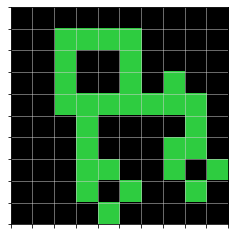

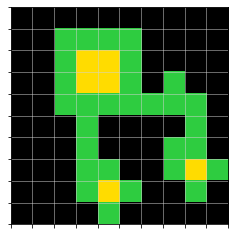

In [212]:
sample_task = read_json('./tasks/00d62c1b.json')
ind = 3
i = sample_task['train'][ind]["input"]
o = sample_task['train'][ind]["output"]

gi = Grid(i)
gi.show()

go = Grid(o)
go.show()

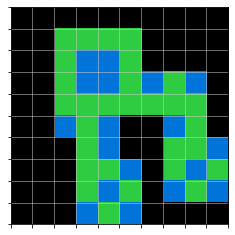

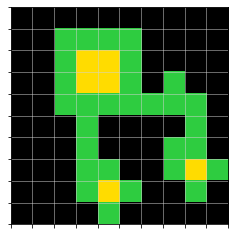

In [213]:
start_points = generate_potential_start_points(gi)
gi_2 = mark_potential_points(gi, start_points)
grid_walk(start_points)

In [214]:
gi.grid == go.grid

True

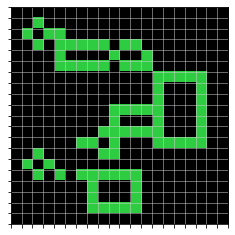

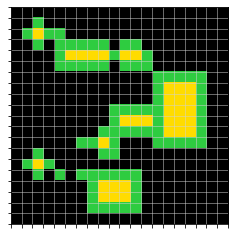

In [215]:
sample_task = read_json('./tasks/00d62c1b.json')
ind = 0
i = sample_task['test'][ind]["input"]
o = sample_task['test'][ind]["output"]
gi = Grid(i)
gi.show()

go = Grid(o)
go.show()

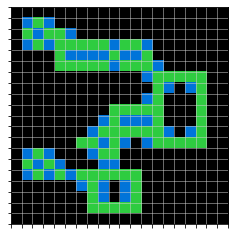

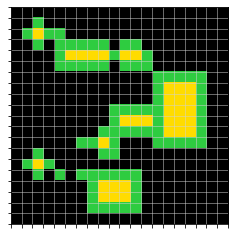

In [216]:
start_points = generate_potential_start_points(gi)
gi_2 = mark_potential_points(gi, start_points)
grid_walk(start_points)

In [211]:
gi.grid == go.grid

True

In [ ]:
## do DFS
## case 1 -- hit an edge 
    ## everything in the visited list becomes 0
    ## stop
## case 2 -- hit a block
    ## continue DFS , check for case 1
    